In [5]:
import os
import pandas as pd
import csv
from exploration_utils import *

## Read News Commentary dataset

In [6]:
source_name = 'News Commentary'
corpus_folder_path = 'corpus/'
corpus_file_path = os.path.join(corpus_folder_path, 'news-commentary-v14.en-ru.tsv')

In [23]:
def read_corpus(corpus_path):
    ''' Loads En/Ru corpus from given path'''
    en, ru = [], []
    rows = []
    with open(corpus_path) as fd:
        rd = csv.reader(fd, delimiter="\t", quotechar='"')
        for row in rd:
            if len(row) == 2 and len(row[0]) > 0 and len(row[1]) > 0:
                en.append(row[0])
                ru.append(row[1])
    return en, ru
english, russian = read_corpus(corpus_file_path)

In [24]:
print(f'Total number of sentences: EN: {len(english)}, RU: {len(russian)}')

Total number of sentences: EN: 280984, RU: 280984


In [25]:
print([x for x in english if len(x) == 0])

[]


In [26]:
en_examples = "\n  ".join(english[3:5])
ru_examples = "\n  ".join(russian[3:5])
print(f'Examples:\nEN:\n  {en_examples}\nRU:\n  {ru_examples}')

Examples:
EN:
  Wouldn’t you know it?
  Since their articles appeared, the price of gold has moved up still further.
RU:
  И что бы вы думали?
  С тех пор как вышли их статьи, стоимость золота повысилась еще больше.


## Analyzing text statistics

In [27]:
print_stats(english, language='English')
print_stats(russian, language='Russian')

Stats for English corpus
	Total number of tokens: 6470649
	Number of unique tokens: 182981
	Average number of words per sentence: 23.028531873700995
	Most frequent tokens: ['the', 'of', 'to', 'and', 'in', 'a', 'is', 'that', 'for', 'be']
Stats for Russian corpus
	Total number of tokens: 5995739
	Number of unique tokens: 356638
	Average number of words per sentence: 21.338364462033425
	Most frequent tokens: ['в', 'и', 'на', 'не', 'что', 'с', 'к', 'для', 'как', '–']


#### Histograms of number of characters per sentence

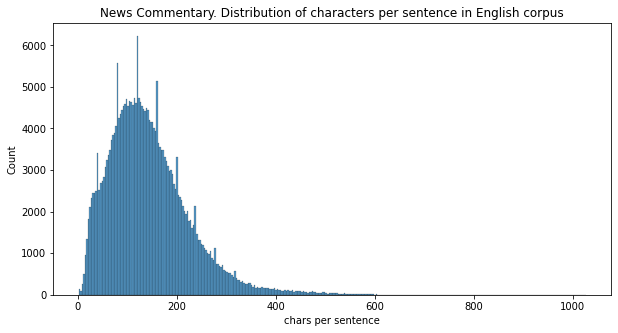

In [28]:
number_of_chars_per_sent_hist(english, source_name, language='English')

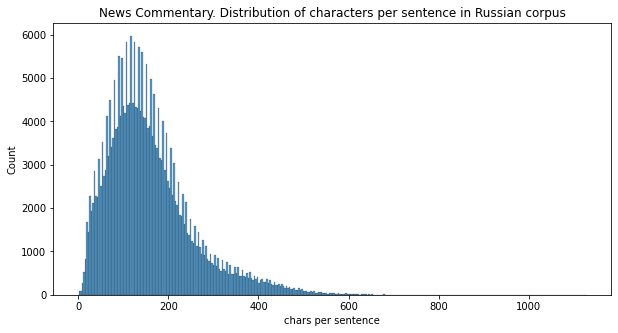

In [29]:
number_of_chars_per_sent_hist(russian, source_name, language='Russian')

The histograms above describe the number of sentences that have particular amount of characters. As it can be seen, most of the sentences have around 150 characters. Between 0 and 200 the the amount of sentences is normally distributed (almost). 

#### Histograms of number of words per sentence

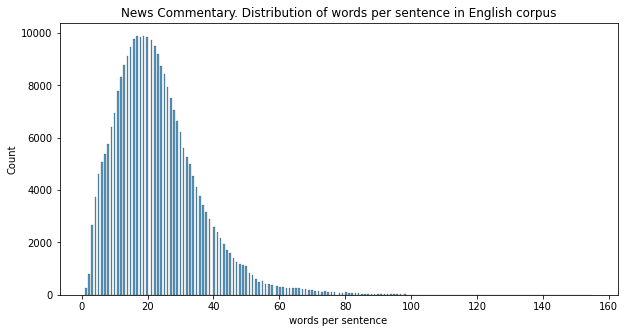

In [30]:
number_of_words_per_sent_hist(english, source_name, language='English')

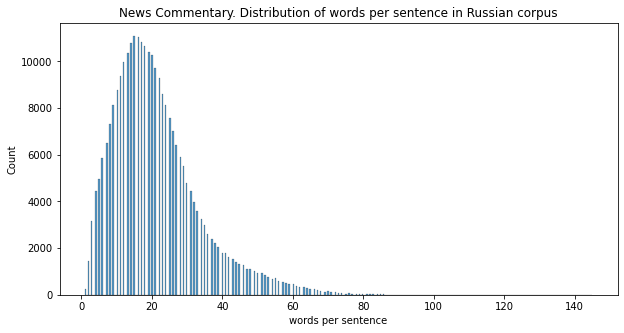

In [31]:
number_of_words_per_sent_hist(russian, source_name, language='Russian')

The above historgrams show the amount of sentences that have particular number of words. Most of the both English and Russian sentences contain between 0-40 words. 

#### Historgrams of average word length in each sentence

Max avg_word_len: 70.0 Min_avg_word_len 2.0


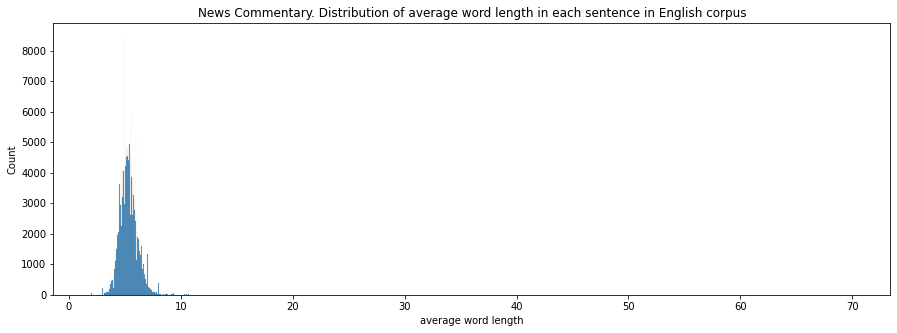

In [32]:
avg_word_len_per_sent_hist(english, source_name, language='English')

Let's see a sentence with the maximum average word length:

In [33]:
print(get_max_avg_word_len_sent(english))

----------------------------------------------------------------------


Max avg_word_len: 83.0 Min_avg_word_len 1.0


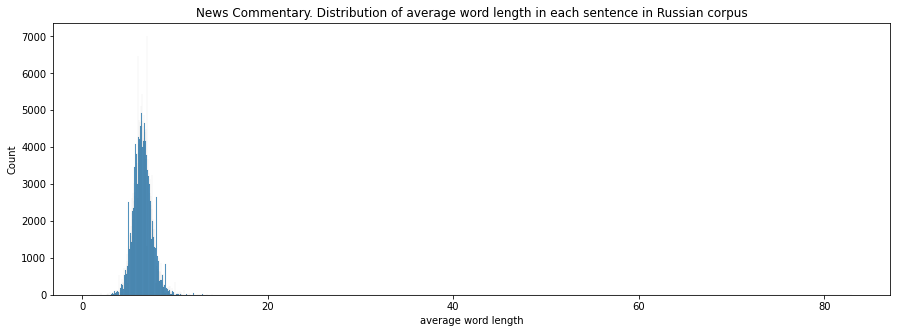

In [34]:
avg_word_len_per_sent_hist(russian, source_name, language='Russian')

In [35]:
print(get_max_avg_word_len_sent(russian))

___________________________________________________________________________________


Most of the sentences have average of 5-10 lengths of words. The sentence with maximum average word length for English contains series of '-' (dashes), and for Russian '\_' (underscore).

#### Barcharts of the most common stopwords

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


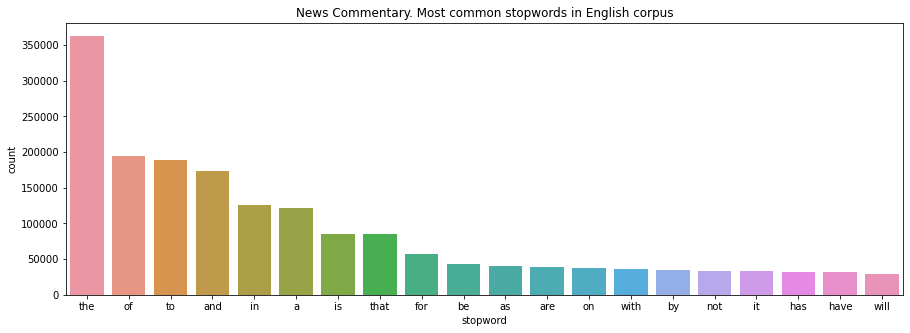

In [36]:
most_common_stopwords_bar(english, source_name, language='English')

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


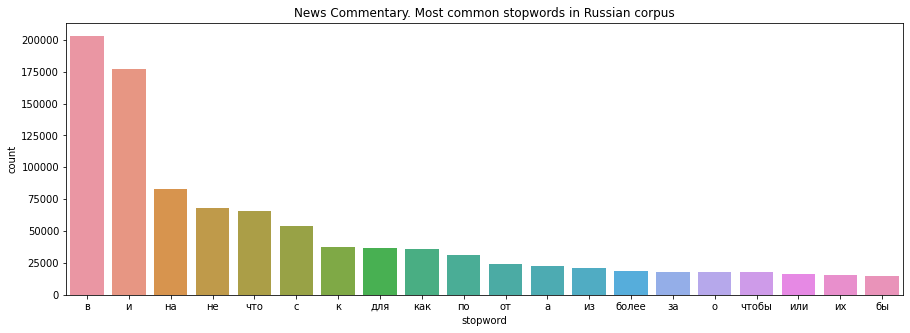

In [37]:
most_common_stopwords_bar(russian, source_name, language='Russian')

The most common words in the dataset are articles, prepositions, in general, stop words. The most common word for English is 'the' and for Russian 'в'.

#### Barcharts of the most common words (except for stopwords)

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


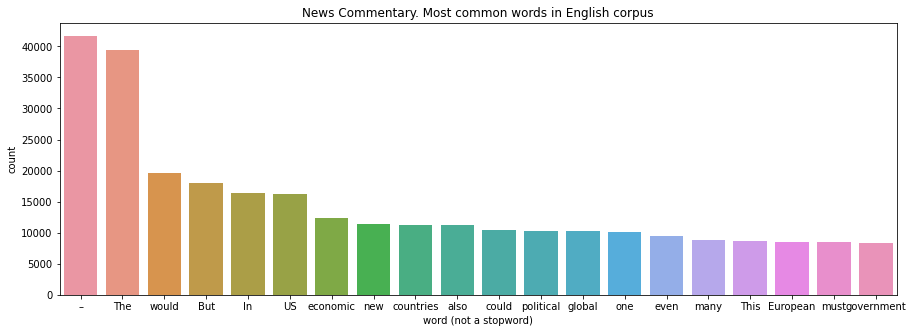

In [38]:
most_common_words_bar(english, source_name, language='English')

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


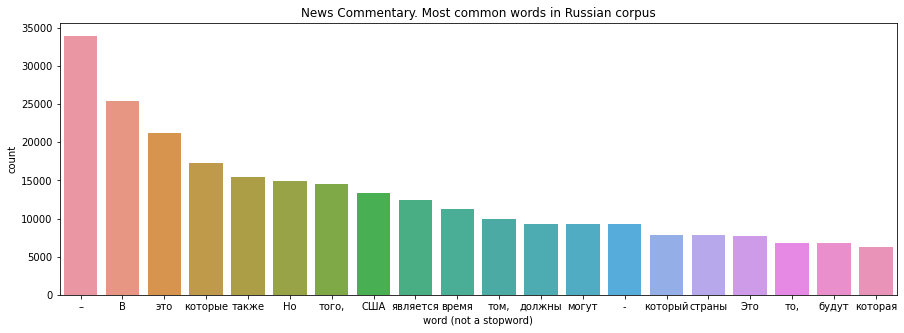

In [39]:
most_common_words_bar(russian, source_name, language='Russian')

The most common words, exluding stop words, are subjects, US ('США'), countries ('страны'), But ('Но'), etc. So, as expected most common words for both languages contain mostly the same (in terms of meaning) words.

#### Barcharts of the most common n-grams (n=2, n=3)

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


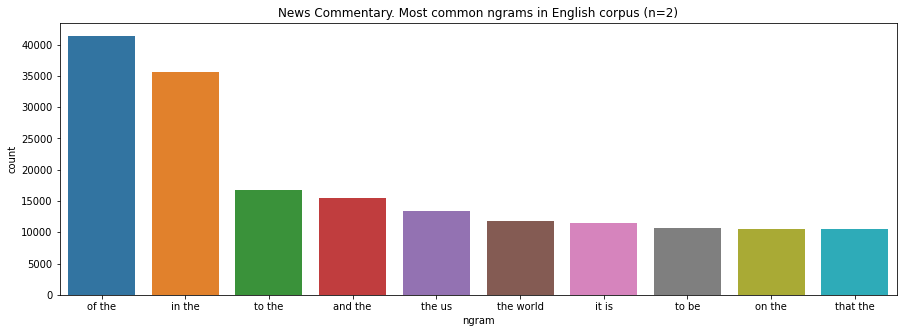

In [40]:
most_common_ngrams_bar(english, source_name, language='English')

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


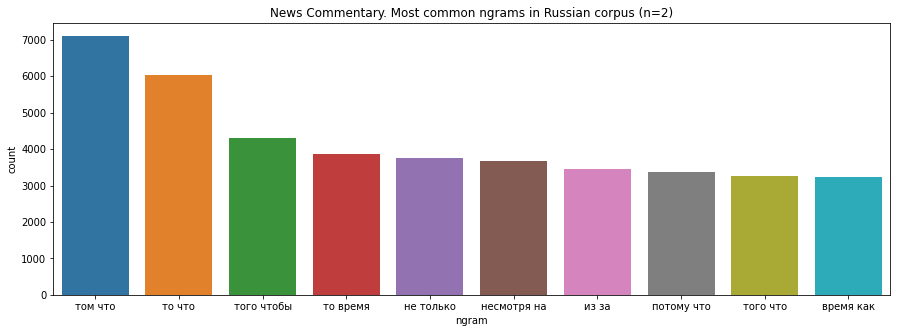

In [41]:
most_common_ngrams_bar(russian, source_name, language='Russian')

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


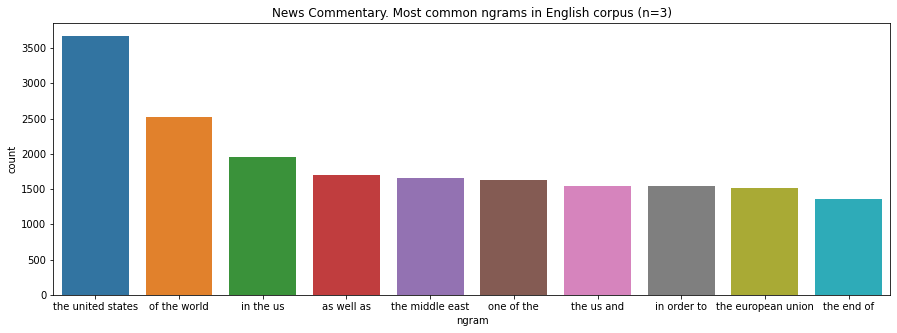

In [42]:
most_common_ngrams_bar(english, source_name, language='English', n=3)

/home/abdurasul/Code/Repos/neural-machine-translation/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


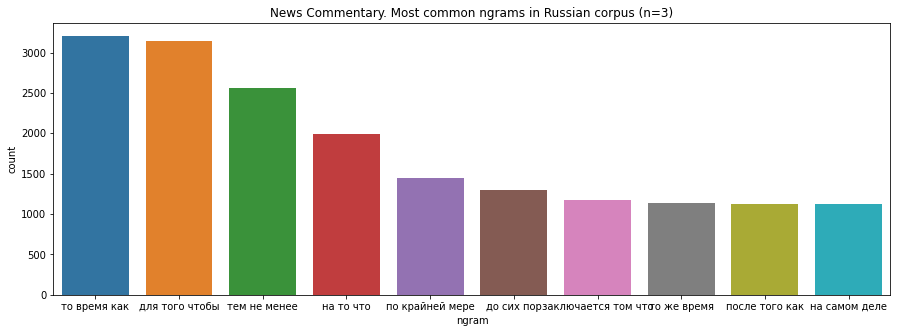

In [43]:
most_common_ngrams_bar(russian, source_name, language='Russian', n=3)

2-grams in English version mostly contains combination of article and preposition. List of most common 3-grams in English version contains common expressions, US (in different forms and combinations). Most common n-grams in Russian version mostly contains common expressions.

## Conclusion

Total number of sentences in the dataset is 280984. Most of the sentences contain around 20 words and 100 characters. Some sentences contain only special characters. Average length of the words is around 5-10. The most common words in the corpus are stop words. Most frequent n-grams contain common expressions and combination of article and preposition (for English).